# <center>Email Spam Detection

---

### Description:

У цьому проєкті досліджується виявлення спаму в електронній пошті за допомогою методів машинного навчання, зосереджуючись на порівнянні ефективності різних моделей класифікації.

Проєкт включає:

1. Дослідження даних
2. Розвідувальний аналіз даних (EDA)
3. Попередня обробка даних
4. Робота з даними
5. Вибір/Вилучення ознак
6. Передбачувальне моделювання
7. Результати роботи та висновоки

Набір даних, взятий із сховища UCI ML, містить близько 4600 електронних листів, позначених як **spam** або **ham**.

### Acknowledgements:
This dataset has been referred from Kaggle.


---

# <center> 1. Дослідження даних

In [1]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
#Importing the dataset

df = pd.read_csv('../input/spamemailsdataset/Spam.csv')
#df.drop([''],axis=1, inplace=True)

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mВисновок:\033[0m Набір даних складається з {} ознак & {} зразків.'.format(df.shape[1], df.shape[0]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,...,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Висновок: Набір даних складається з 58 ознак & 4601 зразків.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mВисновок:\033[0m Набір даних має {} числових та {} ознак категорій.'.format(len(nf),len(cf)))


Висновок: Набір даних має 57 числових та 0 ознак категорій.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,...,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,...,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

**Висновок:** Статистичні дані виглядають нормально, візуалізуємо набір даних для більшого розуміння.

---

# <center> 2. Розвідувальний аналіз даних (EDA)

            Target Variable Distribution           


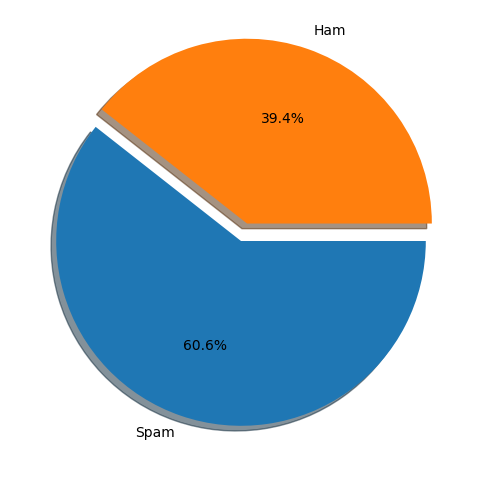

In [7]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Висновок:** Цільова змінна виглядає незбалансованою. Тому треба виконати розширення даних.

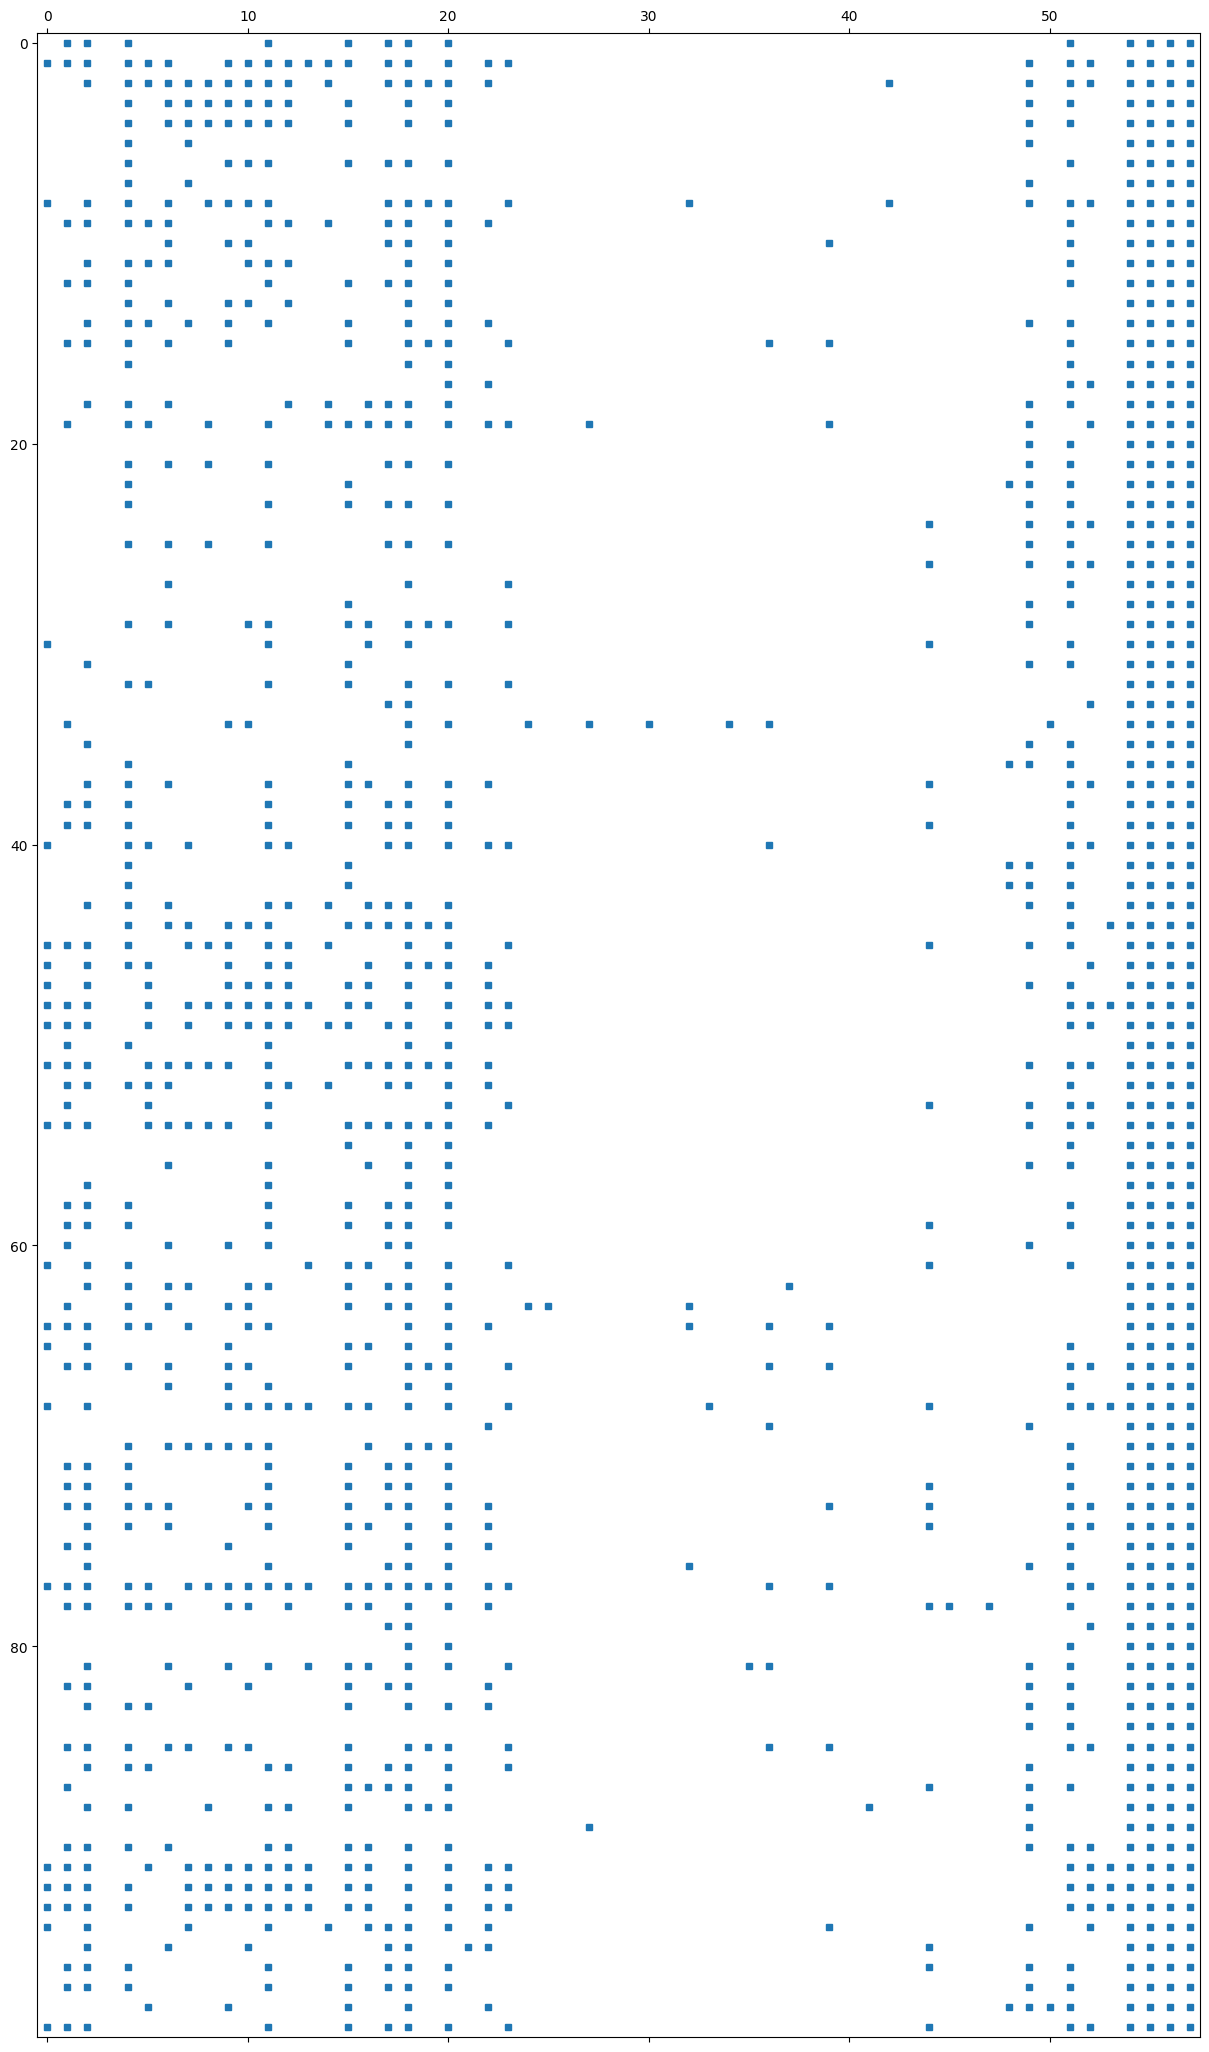

In [8]:
# Visualising the Sparse Matrix

plt.figure(figsize=[15,30])
plt.title('')
plt.spy(df[:100].values, precision = 0.1, markersize = 5)
plt.show()

---

# <center> 3. Попередня обробка даних

In [9]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m Набір даних не має дублікатів')
else:
    print(f'\n\033[1mВисновок:\033[0m Кількість видалених дублікатів ---> {r-df1.shape[0]}')


Висновок: Кількість видалених дублікатів ---> 391


In [10]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                            Total Null Values  Percentage
word_freq_make                              0         0.0
word_freq_857                               0         0.0
word_freq_data                              0         0.0
word_freq_415                               0         0.0
word_freq_85                                0         0.0
word_freq_technology                        0         0.0
word_freq_1999                              0         0.0
word_freq_parts                             0         0.0
word_freq_pm                                0         0.0
word_freq_direct                            0         0.0
word_freq_cs                                0         0.0
word_freq_meeting                           0         0.0
word_freq_original                          0         0.0
word_freq_project                           0         0.0
word_freq_re                                0         0.0
word_freq_edu                               0         0.0
word_freq_tabl

**Висновок:** У наборі даних є багато викидів. Треба заповнити відсутні значення.

In [11]:
#Fixing the imbalance using SMOTE Technique

df5 = df1.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
spam
0    2531
1    1679
Name: count, dtype: int64

Class distribution after applying SMOTE Technique:
spam
1    2531
0    2531
Name: count, dtype: int64


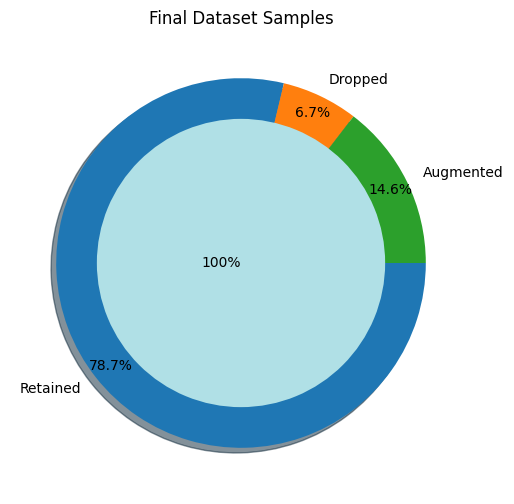


Висновок: Остаточний набір даних після очищення містить 58 ознак & 4601 рядків.


In [12]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df1.shape[0], df5.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mВисновок:\033[0m Остаточний набір даних після очищення містить {} ознак & {} рядків.'.format(df.shape[1], df.shape[0]))

---

# <center> 4. Робота з даними

In [13]:
#Splitting the data intro training & testing sets

df = df5.copy()
df.columns=[i.replace('[','_') for i in df.columns]

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5062, 57) (5062,) 
Training set  --->  (4049, 57) (4049,) 
Testing set   --->  (1013, 57)  (1013,)


In [14]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,4.387150e-18,-3.509720e-18,-1.158207e-16,-2.807776e-17,4.387150e-17,1.579374e-17,4.738121e-17,-3.641334e-17,-2.281318e-17,2.456804e-17,-1.052916e-17,-9.256885e-17,7.896869e-18,-2.632290e-18,2.369061e-17,-1.403888e-17,2.105832e-17,-8.598813e-17,9.651729e-17,2.105832e-17,-8.247841e-17,6.142009e-18,3.509720e-17,4.167792e-18,-1.228402e-17,...,2.325189e-17,5.483937e-17,4.080049e-17,-3.114876e-17,-3.509720e-18,3.509720e-18,-2.763904e-17,-3.334234e-17,-2.105832e-17,1.754860e-17,1.535502e-17,-1.754860e-17,3.685206e-17,-2.281318e-17,-7.019439e-18,8.774299e-18,1.316145e-17,-1.013432e-16,2.544547e-17,-3.509720e-18,2.281318e-17,-2.632290e-18,-1.579374e-17,-1.403888e-17,-1.754860e-18
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.814417e-01,-3.066510e-01,-6.199366e-01,-5.970432e-02,-5.234016e-01,-3.808714e-01,-3.474961e-01,-2.887258e-01,-3.629822e-01,-4.040619e-01,-3.448089e-01,-6.633332e-01,-3.343474e-01,-1.910132e-01,-2.080900e-01,-3.591169e-01,-3.610764e-01,-3.931829e-01,-1.058590e+00,-2.260525e-01,-7.943485e-01,-1.333283e-01,-3.379797e-01,-2.764728e-01,-3.208805e-01,...,-1.704770e-01,-1.370168e-01,-1.828800e-01,-2.523675e-01,-3.220740e-01,-5.693499e-02,-1.682983e-01,-1.941070e-01,-1.195030e-01,-1.587608e-01,-1.915552e-01,-1.201837e-01,-2.836221e-01,-1.909921e-01,-7.681065e-02,-1.079657e-01,-1.642888e-01,-5.138579e-01,-1.888094e-01,-3.759849e-01,-3.519398e-01,-1.221128e-01,-1.400917e-01,-2.775914e-01,-5.058679e-01
25%,-3.814417e-01,-3.066510e-01,-6.199366e-01,-5.970432e-02,-5.234016e-01,-3.808714e-01,-3.474961e-01,-2.887258e-01,-3.629822e-01,-4.040619e-01,-3.448089e-01,-6.633332e-01,-3.343474e-01,-1.910132e-01,-2.080900e-01,-3.591169e-01,-3.610764e-01,-3.931829e-01,-9.583099e-01,-2.260525e-01,-7.943485e-01,-1.333283e-01,-3.379797e-01,-2.764728e-01,-3.208805e-01,...,-1.704770e-01,-1.370168e-01,-1.828800e-01,-2.523675e-01,-3.220740e-01,-5.693499e-02,-1.682983e-01,-1.941070e-01,-1.1950


                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.000509,0.094611,0.036094,-0.048871,0.000674,0.010897,-0.034485,-0.007934,-0.048782,0.038091,-0.018366,0.022310,-0.003891,-0.002119,0.023522,0.001617,-0.026001,-0.001647,0.026840,0.008074,0.051959,-0.013211,0.013296,0.042835,0.049903,...,-0.058099,0.012858,-0.014530,0.023330,0.003524,0.025747,0.008431,0.009918,-0.043659,-0.006800,0.029725,0.016130,0.026886,0.053304,-0.059021,-0.041448,-0.011772,-0.037671,-0.017059,-0.059446,-0.032315,0.067790,0.012587,-0.003172,-0.027065
std,1.008181,1.640896,1.051705,0.165688,0.897255,0.928892,0.865489,0.833724,0.855913,0.945146,0.906618,0.965593,0.873252,1.029043,1.150582,1.073380,0.900912,1.047058,1.039047,1.423152,1.103748,0.929956,1.123037,1.561769,1.275365,...,0.609122,1.034797,0.772780,1.226264,1.076487,1.232467,0.858337,1.009083,0.597793,0.821473,1.054405,1.103731,0.847667,1.341089,0.218654,0.569769,1.079920,0.677142,1.575099,0.529891,0.715542,1.493022,0.945798,0.683288,0.878566
min,-0.381442,-0.306651,-0.619937,-0.059704,-0.523402,-0.380871,-0.347496,-0.288726,-0.362982,-0.404062,-0.344809,-0.663333,-0.334347,-0.191013,-0.208090,-0.359117,-0.361076,-0.393183,-1.058590,-0.226052,-0.794348,-0.133328,-0.337980,-0.276473,-0.320880,...,-0.170477,-0.137017,-0.182880,-0.252368,-0.322074,-0.056935,-0.168298,-0.194107,-0.119503,-0.158761,-0.191555,-0.120184,-0.283622,-0.190992,-0.076811,-0.107966,-0.164289,-0.513858,-0.188809,-0.375985,-0.351940,-0.122113,-0.140092,-0.277591,-0.505868
25%,-0.381442,-0.306651,-0.619937,-0.059704,-0.523402,-0.380871,-0.347496,-0.288726,-0.362982,-0.404062,-0.344809,-0.663333,-0.334347,-0.191013,-0.208090,-0.359117,-0.361076,-0.393183,-0.958373,-0.226052,-0.794348,-0.133328,-0.337980,-0.276473,-0.320880,...,-0.170477,-0.137017,-0.182880,-0.252368,-0.322074,-0.056935,-0.168298,-0.194107,-0.119503,-0.158761,-0.191555,-0.120184,-0.283622,-0.190992,-0.076811,-0.107966,-0.164289,-0.513858,-0.188809,-0.375985,-0.351940,-0.122113,-0.121971,-0.245074,-0.439074
50%,-0.381442,-0.306651,-0.619937,-0.059704,-0.523402,-0.380871,-0.347496,-0.288726,-0.362982,-0.404062,-0.344809,-0.284498,-0.334347,-0.191013,-0.208090,-0.359117,-0.361076,-0.393183,-0.093147,-0.226052,-0.334760,-0.133328,-0.337980,-0.276473,-0.320880,...,-0.170477,-0.137017,-0.182880,-0.252368,-0.322074,-0.056935,-0.168298,-0.194107,-0.119503,-0.158761,-0.191555,-0.120184,-0.283622,-0.190992,-0.076811,-0.107966,-0.164289,-0.248108,-0.188809,-0.286733,-0.351940,-0.122113,-0.103671,-0.207911,-0.330931
75%,-0.177032,-0.280065,0.402141,-0.059704,0.268300,-0.095878,-0.347496,-0.288726,-0.362982,0.134839,-0.344809,0.3

---

# <center> 5. Відбір/Усунення ознак

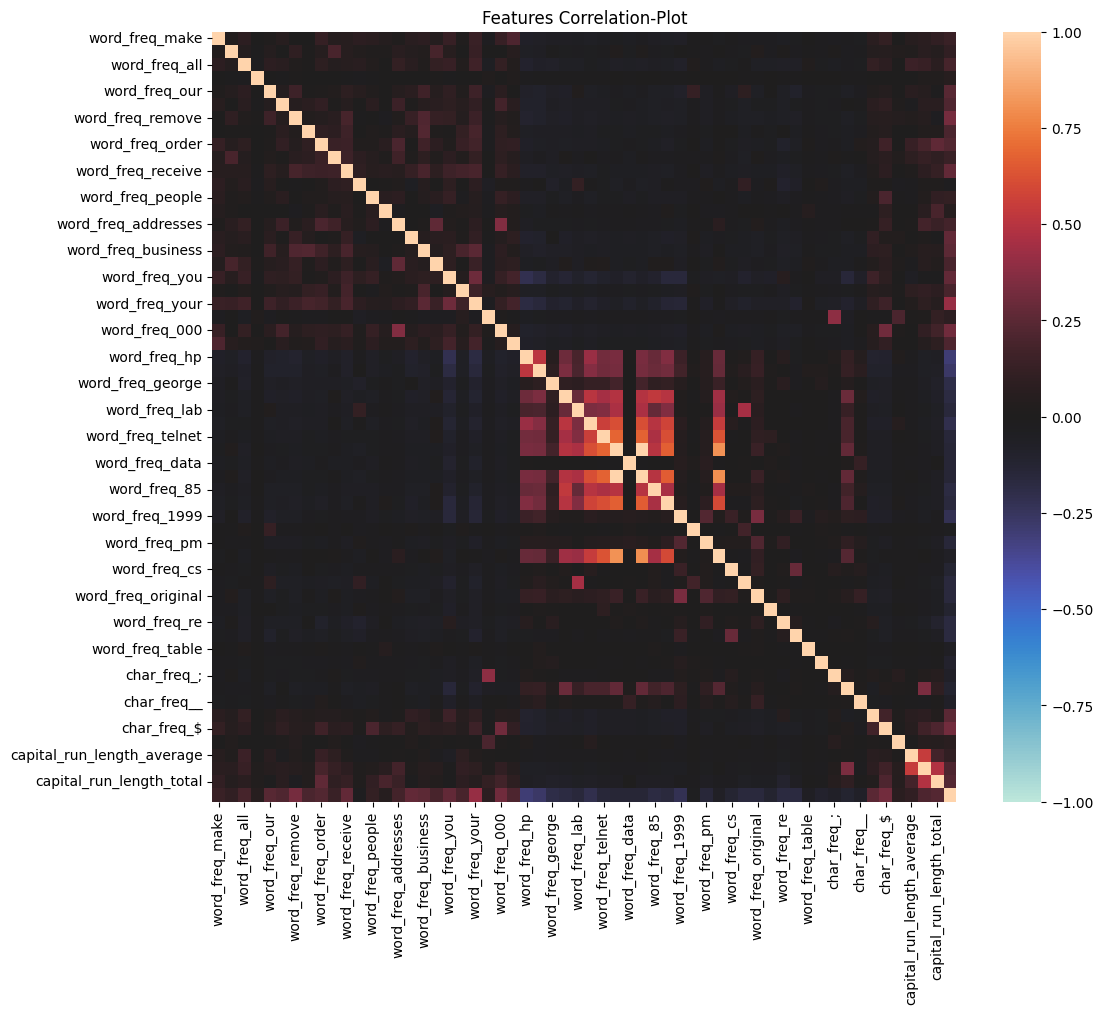

In [15]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

**Висновок:** \
Кореляціж змінихи передає багато інформації про взаємозв’язок між ними. Здається, у наборі даних спостерігається сильна мультиколінеарнісь.

Для вирішення мультиколінеарності обрано метод декомпозиції - Principle Component Analysis (PCA).

PCA є ефективним методом обробки мультиколінеарності, оскільки він перетворює корельовані ознаки на меншу кількість некорельованих компонентів, зменшуючи надмірність у даних. Ця техніка допомагає покращити продуктивність моделі, усуваючи шум, зберігаючи найважливіші відхилення в даних і спрощуючи набір даних для кращої інтерпретації та ефективності обчислень....

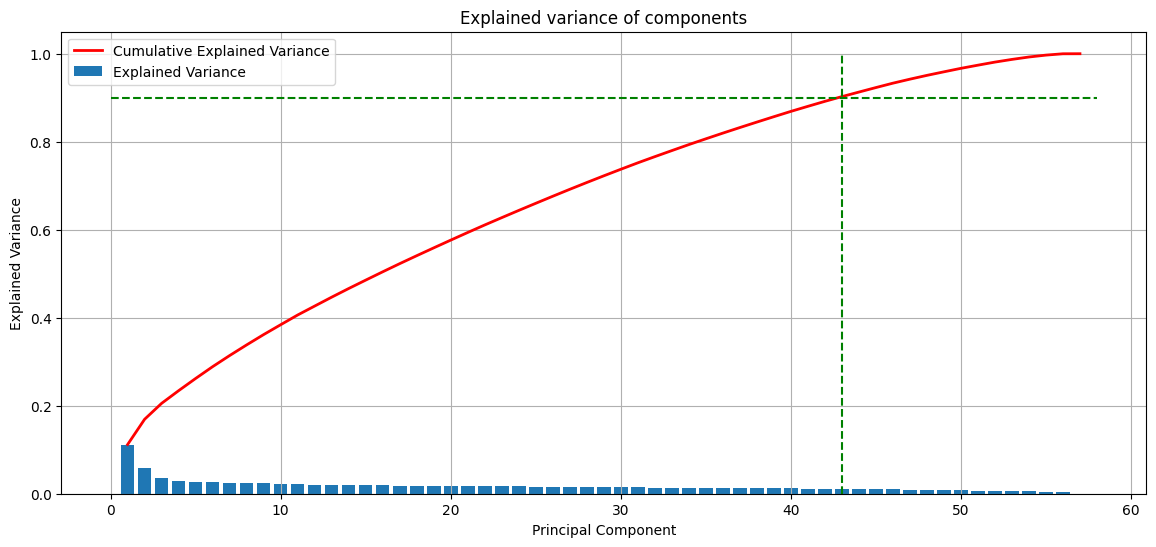

In [16]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([43,43],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Висновок:** Необхідно уникати зменшення розмірності для поточної проблеми.

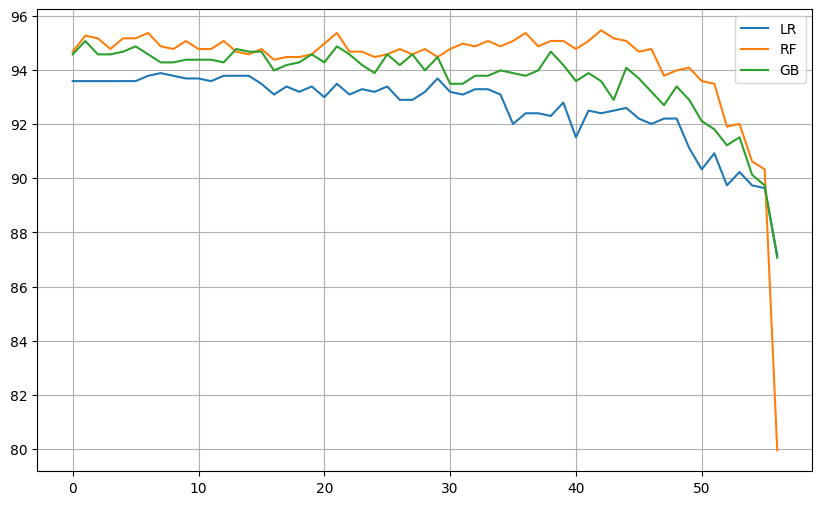

In [17]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y, GradientBoostingClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca), average='weighted') * 100)

scores1=[]; scores2=[]; scores3=[]
for i in range(len(X.columns.values)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y, GradientBoostingClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca), average='weighted') * 100)


    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='GB')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

**Висновок:** \
Результати графіка дозволяють порівняти ефективність моделей при різних кількостях компонентів PCA. Це дає змогу помітити деградацію при сильній компресії, тобто точність моделей починає швидко погіршуватися через втрату важливої інформації.

Якщо зберігати всі компоненти, може з'явитись проблема надмірної кількості ознак, що може знизити ефективність моделей. Щоб уникнути цієї проблеми, можна охопити 90%  відхилень даних, завдяки  n найкращими компонентами PCA.

In [18]:
#Applying PCA Transformations

pca = PCA(n_components=32)

Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

The shape of final transformed training feature set:
(4049, 32)

The shape of final transformed testing feature set:
(1013, 32)


---

# <center> 6. Передбачувальне моделювання

In [19]:
#Let's first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((6,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naive Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naive Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0


In [20]:
#Let's define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    AUC_ROC_plot(Test_Y, pred_prob)
    plt.show()


#Visualising Function
def AUC_ROC_plot(Test_Y, pred_prob):    
    fpr_0, tpr_0, _ = roc_curve(Test_Y, pred_prob[:, 0], pos_label=0)  
    auc_score_0 = auc(fpr_0, tpr_0)
    fpr_1, tpr_1, _ = roc_curve(Test_Y, pred_prob[:, 1], pos_label=1)  
    auc_score_1 = auc(fpr_1, tpr_1)


    plt.plot(fpr_0, tpr_0, color='red', label=f'ROC Curve class 0 (area = {round(auc_score_0, 2)})') 
    plt.plot(fpr_1, tpr_1, color='blue', label=f'ROC Curve class 1 (area = {round(auc_score_1, 2)})') 

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    
    plt.xlim(0, 1) 
    plt.ylim(0, 1)  
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 93.60000000000001%
F1 Score = 93.60000000000001%

 Confusiton Matrix:
 [[484  29]
 [ 36 464]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       513
           1       0.94      0.93      0.93       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



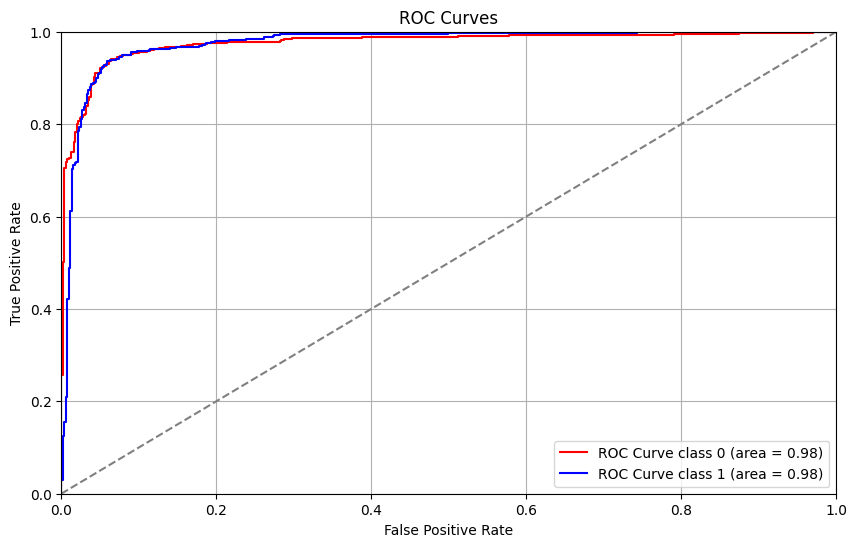


Interpreting the Output of Logistic Regression:

intercept  -2.117162150127564
classes [0 1]


,coeff
word_freq_make,-0.058166
word_freq_address,0.085316
word_freq_all,-0.000704
word_freq_3d,2.525876
word_freq_our,0.324900
word_freq_over,0.144255
word_freq_remove,1.314464
word_freq_internet,0.210820
word_freq_order,0.062399
word_freq_mail,0.027673


In [21]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'liblinear'] # 'lbfgs',
space['penalty'] = ['l2'] #'none','l1','elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 90.9%
F1 Score = 90.9%

 Confusiton Matrix:
 [[467  46]
 [ 46 454]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       513
           1       0.91      0.91      0.91       500

    accuracy                           0.91      1013
   macro avg       0.91      0.91      0.91      1013
weighted avg       0.91      0.91      0.91      1013



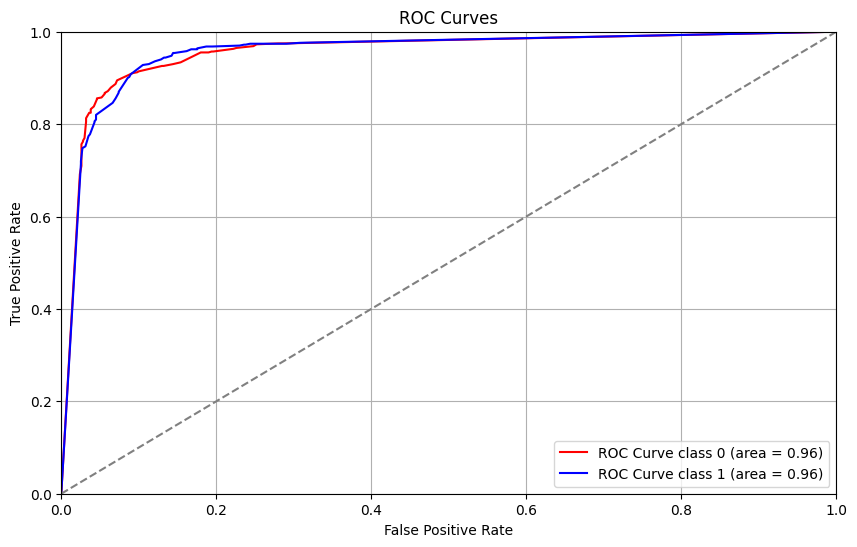


Interpreting the output of Decision Tree:



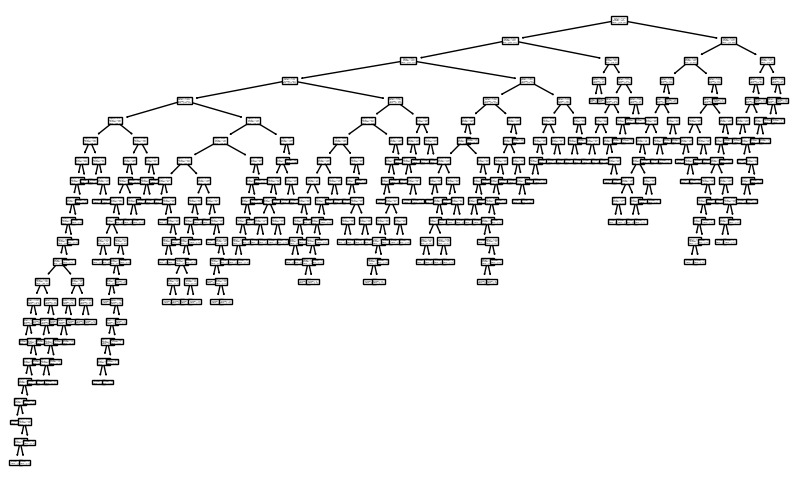

In [22]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 96.2%
F1 Score = 96.1%

 Confusiton Matrix:
 [[500  13]
 [ 26 474]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       513
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



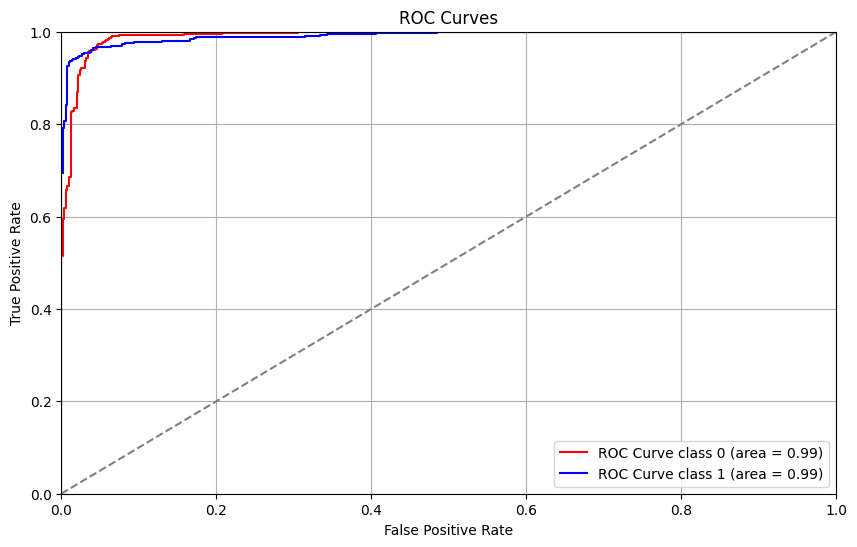


Interpreting the output of Random Forest:



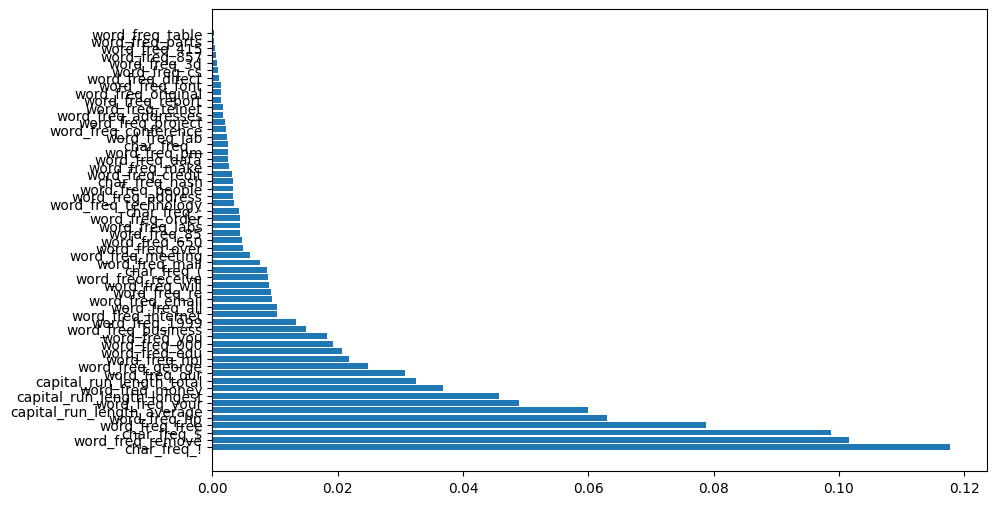

In [23]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist = {'bootstrap': [True, False],
              'max_depth': [10, 20, 50, 100, None],
              'max_features': ['sqrt', None],  # Updated to remove 'auto'
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi = pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index, rfi.values)
plt.show()


---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naive Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 92.60000000000001%
F1 Score = 92.60000000000001%

 Confusiton Matrix:
 [[496  17]
 [ 58 442]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       513
           1       0.96      0.88      0.92       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



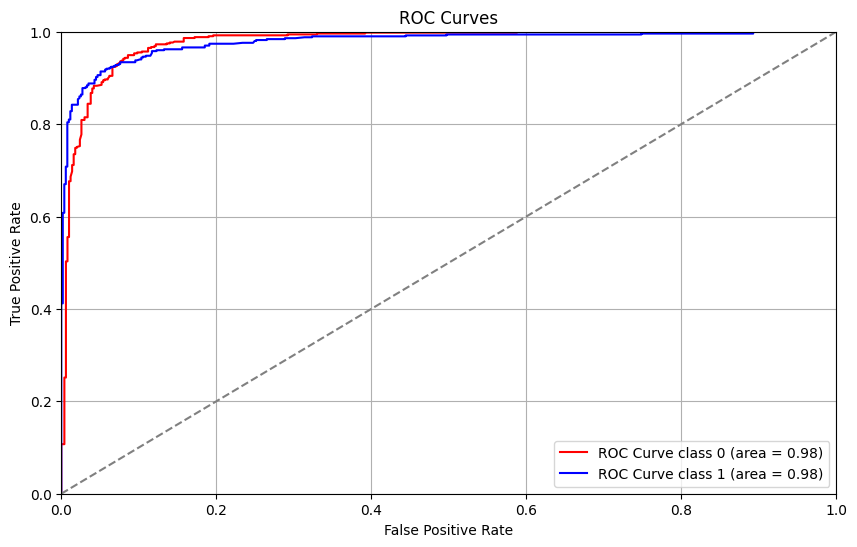

In [24]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 94.39999999999999%
F1 Score = 94.39999999999999%

 Confusiton Matrix:
 [[503  10]
 [ 47 453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       513
           1       0.98      0.91      0.94       500

    accuracy                           0.94      1013
   macro avg       0.95      0.94      0.94      1013
weighted avg       0.95      0.94      0.94      1013



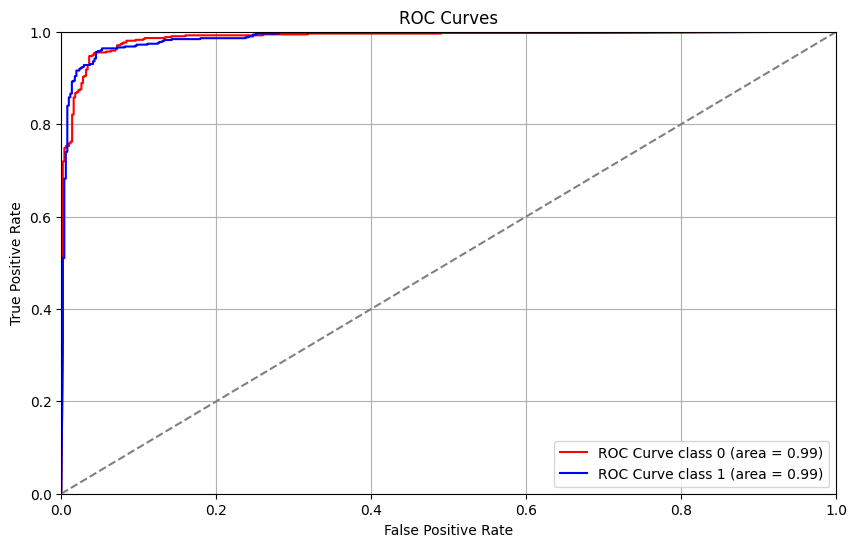

In [25]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 95.8%
F1 Score = 95.8%

 Confusiton Matrix:
 [[499  14]
 [ 29 471]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       513
           1       0.97      0.94      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



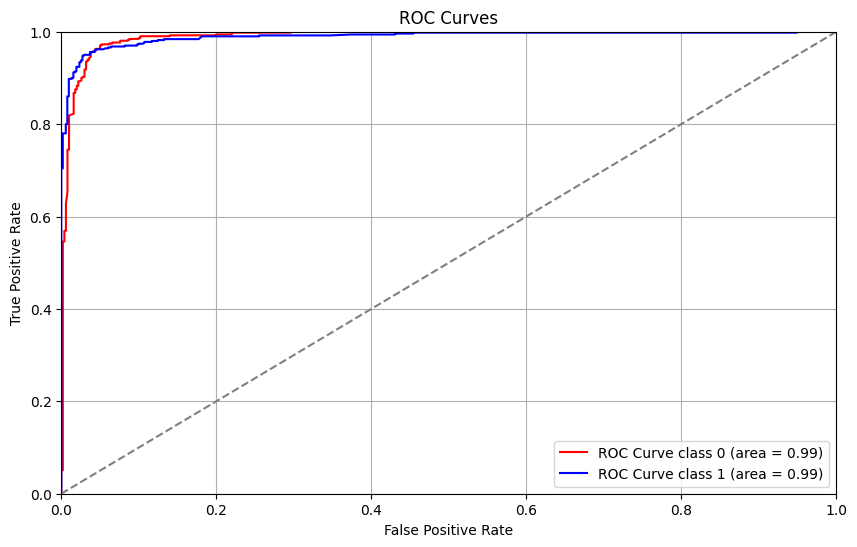

In [26]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

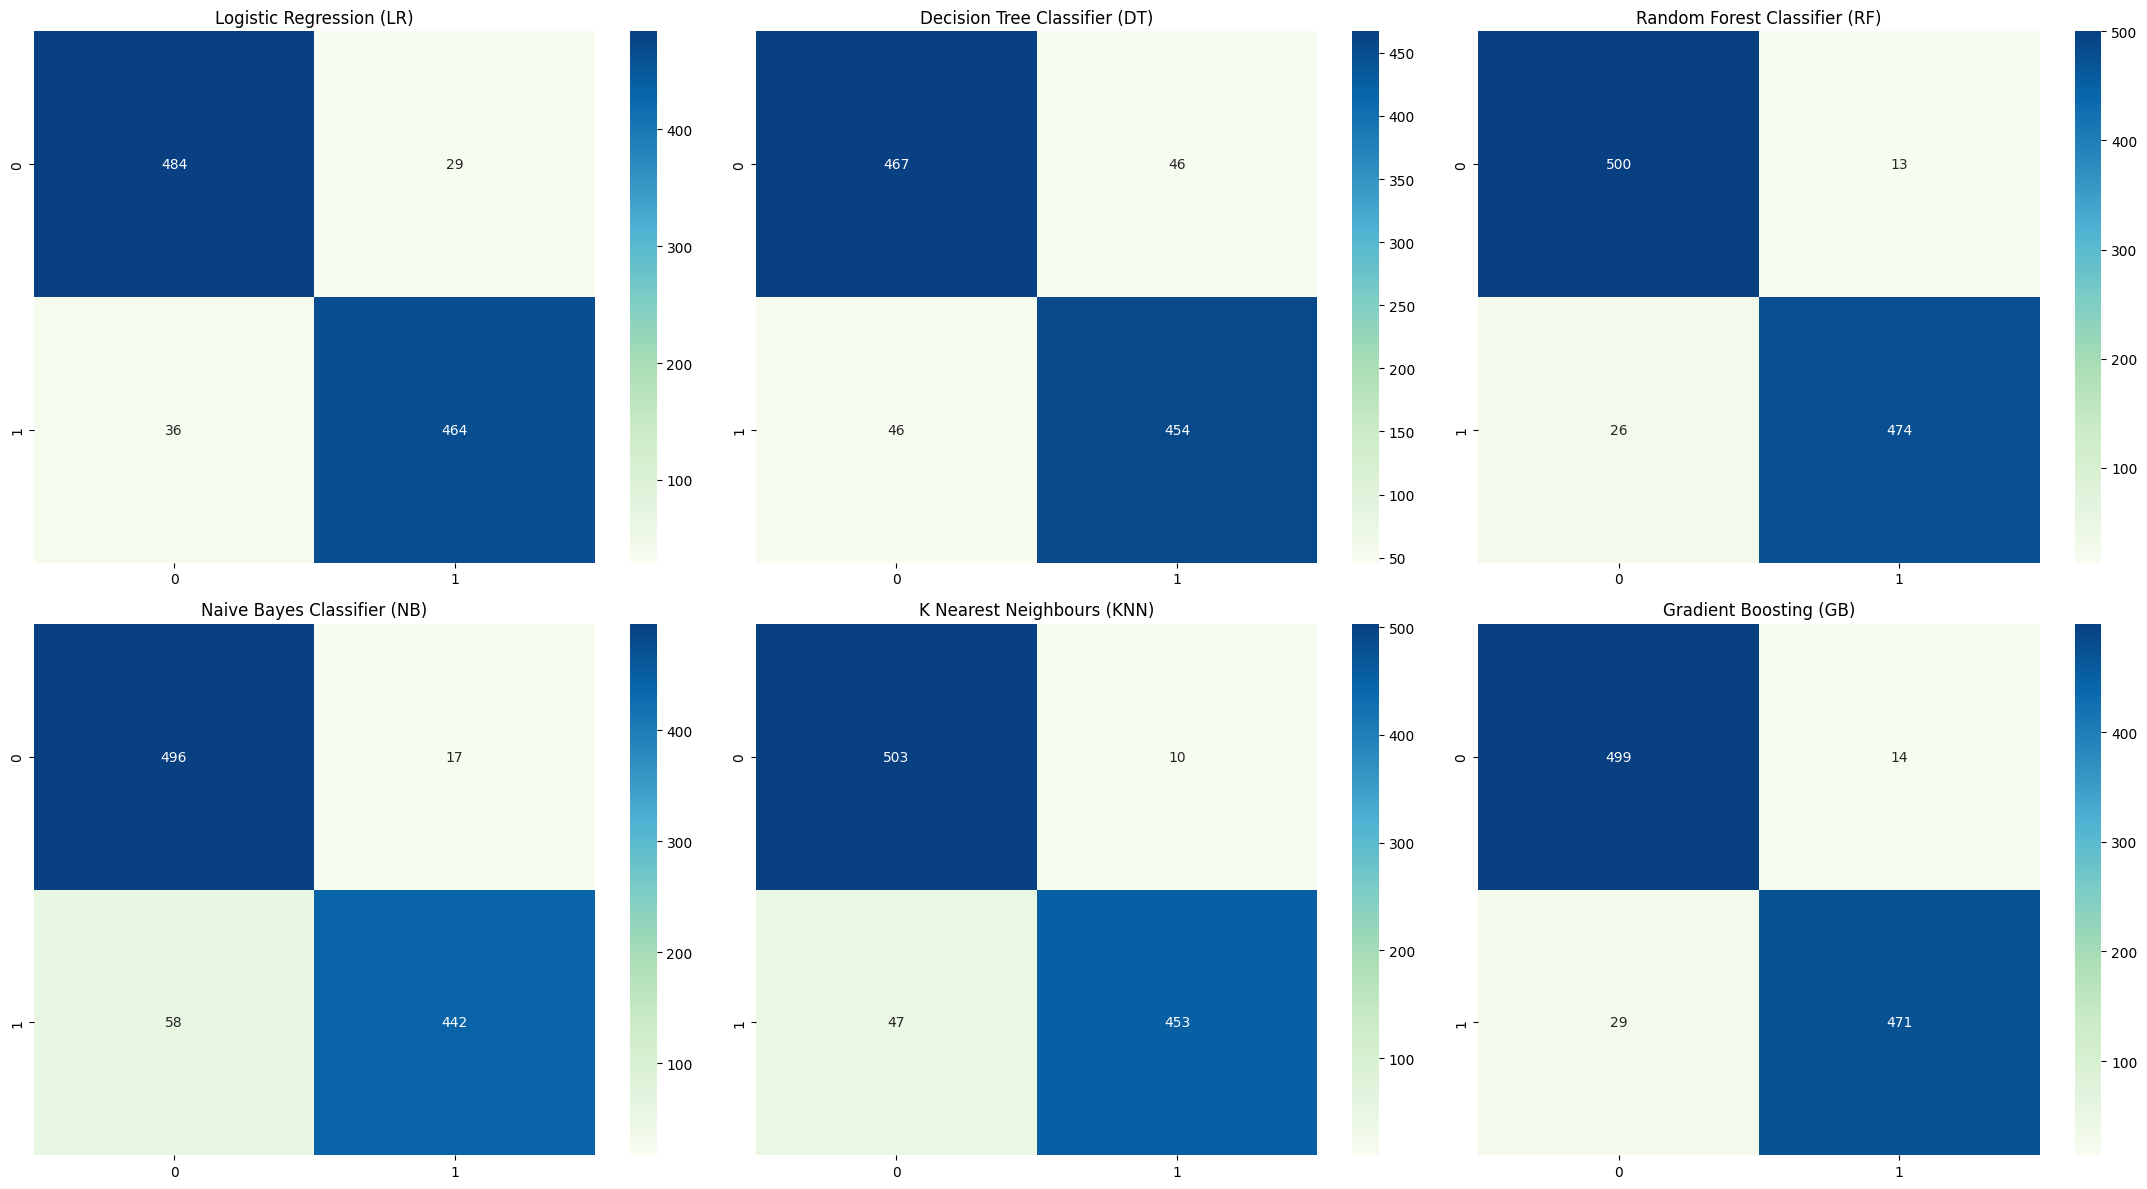

In [27]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[22, 12]) 
    
    for i in range(len(all_models)):
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='GnBu', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,KNN,GB])

                                    ML Algorithms Comparison                                    


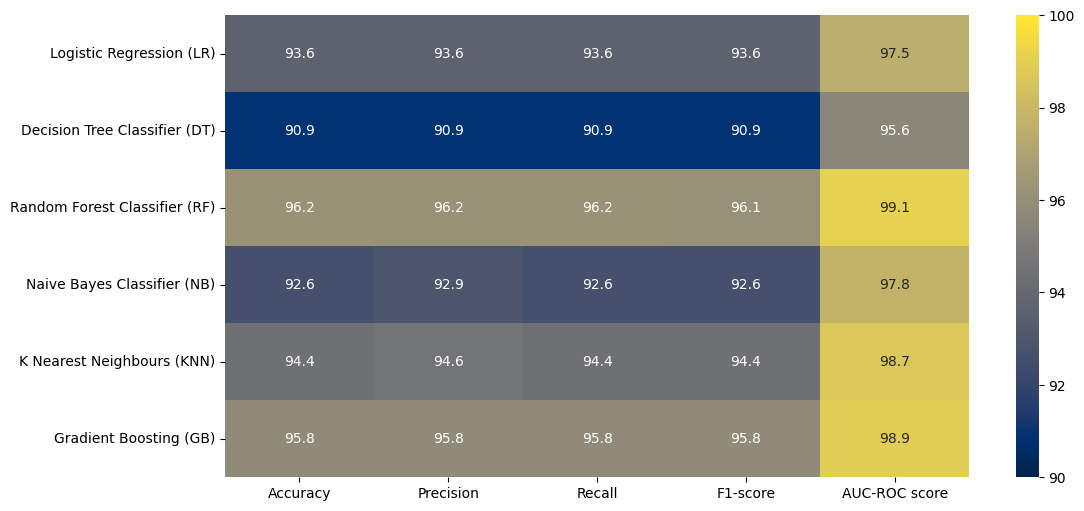

In [28]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,6])
sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='cividis', fmt='.1f')
plt.show()

**Висновки:** З наведеної вище теплової карти можна помітити, що моделі Random Forest та Gradient Boosting показали хороші результати на поточному наборі даних.

---

# <center> 7. Результати роботи та висновоки

- Набір даних був досить малим і складав близько 4600 зразків, після попередньої обробки 14,6% зразків даних було видалено.
- Зразки були дещо незбалансовані після обробки, тому до даних було застосовано техніку SMOTE, щоб збалансувати класи, додавши на 16,7% більше зразків до набору даних.
- Візуалізація розподілу даних і їхніх взаємозв’язків допомогла отримати деяке уявлення про зв’язок між набором функцій.
- Було проведено відбір/усунення ознак, і потрібні функції були включені до списку.
- Тестування кількох алгоритмів із тонким налаштуванням гіперпараметрів дало нам певне розуміння продуктивності моделі для різних алгоритмів на цьому конкретному наборі даних.
- Класифікатор Random Forest та Gradient Boosting працювали надзвичайно добре на поточному наборі даних, вважаючи показник точності ключовим показником.
– Проте доцільно також розглянути простішу модель, таку як логістична регресія, оскільки вона більш узагальнена та менш дорога з обчислювальної точки зору, всупереч незначним неправильним класифікаціям.